# Second Exercise

## Introduction

From the description of the exercise: the dataset provided contains the following columns:

* **product** : possible values: type_p, type_x, type_u, type_ex (where type_p is always the first product the user can purchase)
* **user_id**  : identifier for the user
* **join_data**  : the date the user joined the site
* **hidden** : a user segment estimated when joining our site according to available
data.
* **product** : the ‘type_p’ product that the user purchased when he joined.
* **STV** :(short-term-value) the amount the user has spent on our sites in the first 4 days of his activity.
* **target** : (lifetime value) the outcome variable. It is the amount the user has spent after a little bit more than 2 months. This variable is only contained in the training set.
* **credit_card_level** : one of two types of credit cards.
* **is_lp**: characterizes the traffic source.
* **aff_type**: another traffic source characterization.
* **is_cancelled**: did the user cancel his subscription for the respective product_type within his first few days of activity?
* **country_segment**: from which country is the user?

Moreover in the description it is specified that : *´the business model is a subscription based payment model. The users join the website and pay a small amount for the first day. After one day, their subscription is converted to
a full amount (higher price) subscription, which is charged monthly´* and that *´The user can also
request a refund, and we also have fraudulent users, which is why some target values
are negative´*.


## Hypothesis assumed in the analysis

Due to some missing information  in the dataset (for example: the date of the purchase of the product, the number of products purchased in the first days, the time window of activity of each user, the revenue associated to each product etc..)  some hypothesis will be taken and commented in <span style="color:red">red as hypothesis#</span> in the rest of the notebook

## Section 1 : Exploratory Descriptive Analysis

In [3]:
##change this path with the folder in which you have the dataset
working_directory = "C:/Users/salvatore.lovecchio/Desktop/cmp/DataScientistAssignment/DataScientistAssignment/"


In [4]:
#libraries for the EDA
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
#load the input file
os.chdir(working_directory)
df2 =pd.read_csv(working_directory+'train.csv')

In [5]:
#Pandas profiling provide a nice quick overview of the variable of the dataset, 
#some preview of distribution and correlations. Nice to have a quick idea of the dataset
from pandas_profiling import ProfileReport
ProfileReport(df2,check_correlation = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,881127
Total Missing (%),0.7%
Total size in memory,80.7 MiB
Average record size in memory,96.0 B
Numeric,4
Categorical,6
Boolean,2
Date,0
Text (Unique),0
Rejected,0


Let's verify that the max number of row for each user can be 4 (related to the 4 products aggregated) and let's visualise the distribution of different product purchased by the users

4

Text(0, 0.5, 'Number of users')

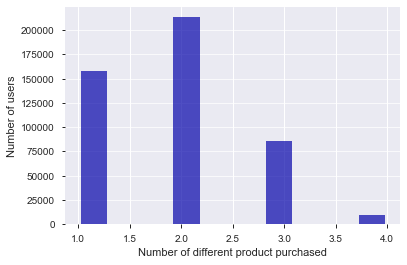

In [6]:
display(max(df2['user_id'].value_counts()))

%matplotlib inline

plt.hist(df2['user_id'].value_counts(),  color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of different product purchased')
plt.ylabel('Number of users')


Let's understand better the info inside the column STV and target. 
I know that 
* STV is the sum of revenue of the products purchased during the first 4 days
* target is total revenue cumulated in a time windows of more or less 2 months
* for the model of business attribution, after the one day, a full amount with higher price subscription
* a product can be cancelled 

Here is not clear if the STV is the cumulative money spent by the user for all the products purchased in the first days.
Let's answer by looking at, for example, the min STV by each product and at country segment since those prices could change for the different countries:



In [7]:
df2.loc[df2['STV']>0,].groupby(['product_type','country_segment']).agg(minSTV=('STV',np.min)).reset_index()


,product_type,country_segment,minSTV
0,type_ex,AU,8.250000
1,type_ex,CA,8.250000
2,type_ex,CL,8.250000
3,type_ex,GB,8.250000
4,type_ex,IL,8.250000
5,type_ex,LK,8.250000
6,type_ex,MY,8.250000
7,type_ex,NG,8.250000
8,type_ex,NZ,8.250000
9,type_ex,Other Countries,8.250000


From the previous output I can deduce that, if it were true that the STV is cumulative it can not happen that the min STV for the products type_x, type_y or type_ex is lower than the type_p which will be always the first product purchased. So since the data show that the STV for the other products, is not always greater than the min STV for type_p, I can assume:

<span style="color:red">Hypothesis #1:</span> the STV and and the target provided are related to the respective product and is not cumulative for all the products, or equivalently, the "channels" of the three product (x,y and ex) are independent. 

Let's look deeper at other examples to extract  info from the STV and target:
let's look at some cases in which we have for example 3 different target related to the same user

In [8]:
unique_target_user = df2.groupby(by='user_id', as_index=False).agg({'target': pd.Series.nunique})

user_3_prod = unique_target_user.loc[unique_target_user['target']==3,'user_id']
df2.loc[df2['user_id'].isin(user_3_prod),].sort_values('user_id', ascending=[False]).head(10)

,product_type,user_id,join_date,hidden,product,STV,target,credit_card_level,is_lp,aff_type,is_cancelled,country_segment
881124,type_x,1188685.0,2019-06-30 23:57:56,0,product_3,16.67513,80.19563,standard,0,PPS,0.0,US
597070,type_u,1188685.0,2019-06-30 23:57:56,0,product_3,11.90512,35.71538,standard,0,PPS,0.0,US
540512,type_p,1188685.0,2019-06-30 23:57:56,0,product_3,16.27763,48.03788,standard,0,PPS,0.0,US
881102,type_x,1188622.0,2019-06-30 23:45:33,0,product_1,0.79500,0.79500,standard,0,PPS,1.0,US
540481,type_p,1188622.0,2019-06-30 23:45:33,0,product_1,0.39750,0.39750,standard,0,PPS,1.0,US
73671,type_ex,1188622.0,2019-06-30 23:45:33,0,product_1,8.25000,8.25000,standard,0,PPS,NaN,US
881100,type_x,1188608.0,2019-06-30 23:42:09,0,product_1,0.39750,32.15775,standard,1,PPS,0.0,RU
540476,type_p,1188608.0,2019-06-30 23:42:09,0,product_1,0.39750,17.07263,standard,1,PPS,0.0,RU
73670,type_ex,1188608.0,2019-06-30 23:42:09,0,product_1,8.25000,8.25000,standard,1,PPS,NaN,RU
540417,type_p,1188458.0,2019-06-30 23:10:24,0,product_1,1.19250,1.19250,standard,1,PPS,0.0,Other Countries


Another interesting observation is that not always target is greater to STV. In particular I can extract the following rule based on <span style="color:red">Hypothesis #2:</span> :
* if target<0 : from the description I know it is a fraudulent case
* if target <= STV : the user did not convert to the full inscription
* if target > STV : the user did the full inscription

A deeper analysis of this dimension (the "status" of the user) would be needed to understand how to retain the best user and how to predict the churn rate for example

In [9]:
#let's add a new column to see if the user was active (full inscription), inactive (cancelled inscription) or fraudulent (target <0)
df2['status'] = np.where(df2['target'] > df2['STV'], "active" ,
        np.where(df2['target'] <= df2['STV'],"inactive", "fraudulent"))
df2.head()

,product_type,user_id,join_date,hidden,product,STV,target,credit_card_level,is_lp,aff_type,is_cancelled,country_segment,status
0,type_ex,7.0,2018-12-01 00:01:45,0,product_1,8.25,8.25,standard,0,PPL,NaN,US,inactive
1,type_ex,20.0,2018-12-01 00:06:05,0,product_2,8.25,8.25,standard,0,PPL,NaN,US,inactive
2,type_ex,22.0,2018-12-01 00:06:23,0,product_3,8.25,8.25,prepaid,0,PPL,NaN,US,inactive
3,type_ex,26.0,2018-12-01 00:07:12,0,product_2,8.25,8.25,standard,0,PPL,NaN,US,inactive
4,type_ex,59.0,2018-12-01 00:15:21,0,product_2,8.25,8.25,standard,0,PPL,NaN,Other Countries,inactive


Let's have a look at the distribution of STV and Revenue for the different products.
As an example, simple plot like STV vs Target and the distribution of the target values can help to understand how to classify the users and eventual segment all the users into High, Medium, Low "profitable".

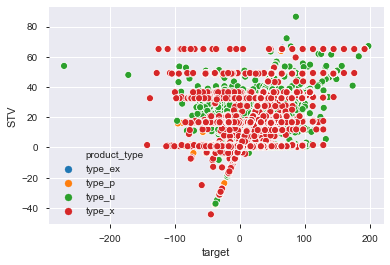

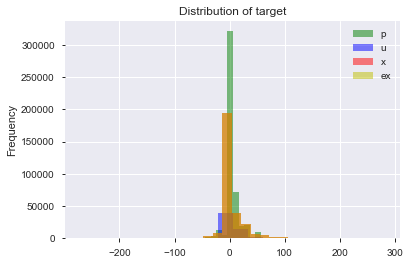

In [10]:
sns.scatterplot(x="target", y="STV",
              hue="product_type",
              data=df2.loc[df2['country_segment']=="US"])

plt.show()


x1 = df2.loc[df2.product_type=='type_p', 'target']
x2 = df2.loc[df2.product_type=='type_u', 'target']
x3 = df2.loc[df2.product_type=='type_x', 'target']
x4 = df2.loc[df2.product_type=='type_ex', 'target']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='g', label='p')
plt.hist(x2, **kwargs, color='b', label='u')
plt.hist(x3, **kwargs, color='r', label='x')
plt.hist(x3, **kwargs, color='y', label='ex')

plt.gca().set(title='Distribution of target', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();
plt.show()


Previously, it I saw that there are some missing values in is_cancelled column. Let's investigate:

In [11]:
display(df2.loc[df2['is_cancelled'].isnull(),'product_type'].count())
display(len(df2.loc[df2['product_type']=='type_ex']))
display(df2.loc[df2['is_cancelled'].isnull(),'product_type'].unique())



73673

73673

array(['type_ex'], dtype=object)

The number of missing value in the column "is_cancelled" is exactly equals to the number of row associated with product_type ="type_ex". As a double check, the unique product type related to the rows with missing canceled value is only "type_ex". One conclusion here is that maybe this product can not be cancelled : this bring to the 
<span style="color:red">Hypothesis #3:</span> the product type_ex can not be cancelled. Let's fill with 0 the missing values.

In [12]:
#substitute nan in is cancelled with 0
df2['is_cancelled'] = df2['is_cancelled'].fillna(0)

As a last step for this quick pre analysis, let's check if we detect some correlation in the variables. There is a preview of the correlation in the pandas profing, but missing the categorical variable. Let's convert the cathegorical variables into dummies variable and check the correlation:

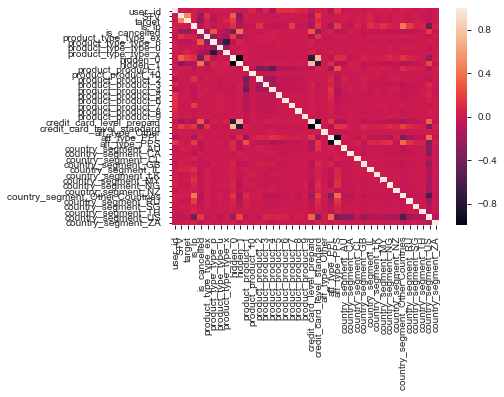

In [13]:
#convert the no numerical variable into dummy variable
df2=pd.get_dummies(df2, columns=['product_type'])
df2=pd.get_dummies(df2, columns=['hidden'])
df2=pd.get_dummies(df2, columns=['product'])
df2=pd.get_dummies(df2, columns=['credit_card_level'])
df2=pd.get_dummies(df2, columns=['aff_type'])
df2=pd.get_dummies(df2, columns=['country_segment'])
corr = df2.corr()
sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns)

In [14]:
#let's print the  pair with correlation > 0.60
corr_matrix = df2.corr().abs()
high_corr_var = np.where(abs(corr_matrix) > 0.50)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if
                     x != y and x < y ]

print(high_corr_var)

[('STV', 'target'), ('product_type_type_p', 'product_type_type_x'), ('hidden_0', 'hidden_1'), ('hidden_0', 'credit_card_level_prepaid'), ('hidden_0', 'credit_card_level_standard'), ('hidden_1', 'credit_card_level_prepaid'), ('hidden_1', 'credit_card_level_standard'), ('credit_card_level_prepaid', 'credit_card_level_standard'), ('aff_type_PPL', 'aff_type_PPS'), ('country_segment_Other Countries', 'country_segment_US')]


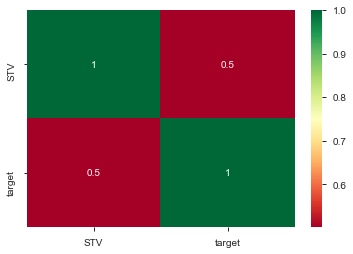

In [15]:
# most correlated features with target and abs corr >0.5
top_corr_features = corr_matrix.index[abs(corr_matrix["target"])>0.5]
g = sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From previous analysis, not clear correlation with target can be found exept from the STV.


As conclusion of the EDA, adding more information into the original dataset (in particular what is the time range corresponding to the target, the revenue per product/inscription, the number of product purchased in the first days, the date each product has been purchased ..) could enrich the analysis. As idea, an interesting analysis can be a **recomendation system** (the probability a user that bought  product A will buy product B). 


## Section 2 : Model

In the next sectiion, I will go through a first approach to build a model for this problem. However, in a real project development, before to build a model ready for production or even a toy model for a test, it would be necessary to clarify all the open points related to the dataset, check the validity of the previous hypothesis and, if possible, add more relevant dimension. 

For this regression problem, I will apply and compare three models: Random Forest, CatBoost and XGBoost and I will compare their answer. For the dimensions, as suggested in the submission file, I  will aggregate the input at granularity: join data / country segment / product type 

Just for the random Forest, as an example, I will include a tuning process optimization. I will skip this process for the other two because, as said, I will not expect the model could work perfectly since some open questions are still pending on the dataset.

In [16]:
#load the libraries for the model
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import xgboost as xgb


In [17]:
#let's reload the data set and group the input

os.chdir(working_directory)
df2 =pd.read_csv(working_directory+'train.csv')

df2['is_cancelled'] = df2['is_cancelled'].fillna(0)
df2['join_month_year']= pd.DatetimeIndex(df2['join_date'])
df2['join_month_year']=df2['join_month_year'].apply(lambda x: x.strftime('%Y-%m'))

##group by like in the submission example


dfnew=df2.groupby(['join_month_year','country_segment','product_type']).agg(target1=('target',np.mean),
                                            STV1=('STV',np.mean),
                                            credit_card_level1=('credit_card_level',lambda x:stats.mode(x)[0]),
                                            is_lp1=('is_lp',lambda x:stats.mode(x)[0]),
                                            hidden1=('hidden',lambda x:stats.mode(x)[0]),
                                            aff_type1=('aff_type',lambda x:stats.mode(x)[0]),
                                            is_cancelled1=('is_cancelled',lambda x:stats.mode(x)[0])                                                                                      
                                                                          ).reset_index()
#### join_month_year split in month and year
dfnew['join_year'] = pd.to_numeric(dfnew['join_month_year'].str[:4])
dfnew['join_month'] = pd.to_numeric(dfnew['join_month_year'].str[5:7])

dfnew=dfnew.drop(['join_month_year'], axis=1)
df_bkp = dfnew
display(dfnew.head())
display(len(dfnew))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,country_segment,product_type,target1,STV1,credit_card_level1,is_lp1,hidden1,aff_type1,is_cancelled1,join_year,join_month
0,AU,type_ex,8.465136,8.465136,standard,0,0,PPL,0.0,2018,12
1,AU,type_p,7.407734,5.485068,standard,0,0,PPL,0.0,2018,12
2,AU,type_u,6.743645,5.529771,standard,0,0,PPL,0.0,2018,12
3,AU,type_x,11.096927,6.982219,standard,0,0,PPL,0.0,2018,12
4,CA,type_ex,8.458861,8.458861,standard,0,0,PPL,0.0,2018,12


420

In [18]:
#convert the no numerical variable into dummy variable
dfnew=pd.get_dummies(dfnew, columns=['product_type'])
dfnew=pd.get_dummies(dfnew, columns=['hidden1'])
dfnew=pd.get_dummies(dfnew, columns=['credit_card_level1'])
dfnew=pd.get_dummies(dfnew, columns=['aff_type1'])
dfnew=pd.get_dummies(dfnew, columns=['country_segment'])


#split into train and test for the models
X= pd.DataFrame(dfnew).drop(['target1'], axis = 1)
y=pd.DataFrame(dfnew).loc[:,'target1']
#print(X.head())
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=13)

In [19]:
#Let's define a common evaluation function to print some guidline about the performance of the model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)

    # Performance metrics
    
    display(print ('Metrics for Regression Model Trained on Original Data \n',
                  "Mean absolute error =", round(sm.mean_absolute_error( test_labels, predictions), 2),'\n',
                  "Mean squared error =", round(sm.mean_squared_error( test_labels, predictions), 2),'\n',                          
                  "Median absolute error =", round(sm.median_absolute_error( test_labels, predictions), 2),'\n', 
                  "Explain variance score =", round(sm.explained_variance_score( test_labels, predictions), 2),'\n',
                  "R2 score =", round(sm.r2_score( test_labels, predictions), 2)
                  ))
    



## Random Forest

First let's use the random grid to investigate which is the best hyperparameter space I should consider

In [20]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num=2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 200, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 50, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]  # Create the random grid
random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=4, verbose=2,
                                   random_state=42, n_jobs=4)  # Fit the random search model,  n_jobs=-1 is not accepted in windows
rf_random.fit(X_train, y_train)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

rf_random.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.8s finished


Metrics for Regression Model Trained on Original Data 
 Mean absolute error = 1.0 
 Mean squared error = 3.07 
 Median absolute error = 0.4 
 Explain variance score = 0.8 
 R2 score = 0.8


None

{'n_estimators': 1600,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [21]:
#let's use the previous parameters for the best estimator
random_forest = RandomForestRegressor(n_estimators=1600,
                                           bootstrap=True,
                                           max_depth=5,
                                           max_features='auto',
                                           min_samples_leaf=10,
                                           min_samples_split=20)
    #cross validation
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

results_rf = cross_val_score(random_forest, X_train, y_train, cv=kfold)
df_result_rf=pd.DataFrame(results_rf, columns=['random_forest']) 

#let's print the mean and std of the accuracy on the kfold
print("Accuracy: %.2f%% (%.2f%%)" % (results_rf.mean() * 100, results_rf.std() * 100))

random_forest=random_forest.fit(X_train, y_train)
evaluate(random_forest, X_test, y_test)

Accuracy: 68.90% (10.08%)
Metrics for Regression Model Trained on Original Data 
 Mean absolute error = 1.01 
 Mean squared error = 3.08 
 Median absolute error = 0.41 
 Explain variance score = 0.8 
 R2 score = 0.8


None

In [22]:
#now let's join the train and test subsamble to train the final model 
X_all= X_train.append(X_test)
y_all =y_train.append(y_test)
random_forest=random_forest.fit(X_all, y_all)


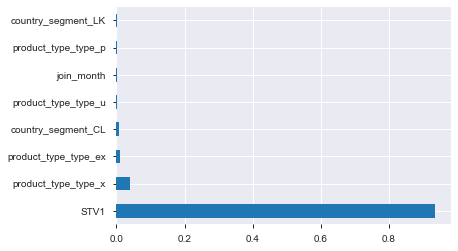

In [23]:
#print the importance of the top 8  feautures
feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')


## XGBoost

In [24]:
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

    #### cross validation to check the accuracy of the parameter of best model #############
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results_xg = cross_val_score(model_xgb, X_train, y_train, cv=kfold)
df_result_xg=pd.DataFrame(results_xg, columns=['XgBoost']) 

print("Accuracy: %.2f%% (%.2f%%)" % (results_xg.mean() * 100, results_xg.std() * 100))
model_xgb=model_xgb.fit(X_train, y_train)
evaluate(model_xgb, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy: 73.15% (15.44%)
Metrics for Regression Model Trained on Original Data 
 Mean absolute error = 0.84 
 Mean squared error = 2.25 
 Median absolute error = 0.36 
 Explain variance score = 0.85 
 R2 score = 0.85


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


None

In [25]:
#now let's join the train and test subsamble to train the final model 
X_all= X_train.append(X_test)
y_all =y_train.append(y_test)
model_xgb=model_xgb.fit(X_all, y_all)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


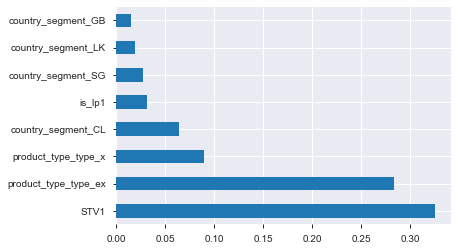

In [26]:
#print the importance of the top 8  feautures
feat_importances = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')


## CatBoost

CatBoost is known to perform better on the dataset with cathegorical variable, so let's pass to catboost the dataset without the dummy variable (df_bkp) and check the performance

In [27]:
df_bkp.head()

,country_segment,product_type,target1,STV1,credit_card_level1,is_lp1,hidden1,aff_type1,is_cancelled1,join_year,join_month
0,AU,type_ex,8.465136,8.465136,standard,0,0,PPL,0.0,2018,12
1,AU,type_p,7.407734,5.485068,standard,0,0,PPL,0.0,2018,12
2,AU,type_u,6.743645,5.529771,standard,0,0,PPL,0.0,2018,12
3,AU,type_x,11.096927,6.982219,standard,0,0,PPL,0.0,2018,12
4,CA,type_ex,8.458861,8.458861,standard,0,0,PPL,0.0,2018,12


In [28]:
#split the df_bkp
X= pd.DataFrame(df_bkp).drop(['target1'], axis = 1)
y=pd.DataFrame(df_bkp).loc[:,'target1']
print(X.head())
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=13)

  country_segment product_type      STV1 credit_card_level1  is_lp1  hidden1  \
0              AU      type_ex  8.465136           standard       0        0   
1              AU       type_p  5.485068           standard       0        0   
2              AU       type_u  5.529771           standard       0        0   
3              AU       type_x  6.982219           standard       0        0   
4              CA      type_ex  8.458861           standard       0        0   

  aff_type1  is_cancelled1  join_year  join_month  
0       PPL            0.0       2018          12  
1       PPL            0.0       2018          12  
2       PPL            0.0       2018          12  
3       PPL            0.0       2018          12  
4       PPL            0.0       2018          12  
0     8.465136
1     7.407734
2     6.743645
3    11.096927
4     8.458861
Name: target1, dtype: float64


In [29]:
categorical_features_indices = np.where(X_train.dtypes == np.object)[0]

model_cat = CatBoostRegressor(cat_features=categorical_features_indices,random_state=7)

''' #verify the accuracy of the basic model'''
kfold = KFold(n_splits=5, random_state=123, shuffle=True)
results_cat = cross_val_score(model_cat, X_train, y_train, cv=kfold)
df_result_cat=pd.DataFrame(results_cat, columns=['catBoost']) 
print("Accuracy: %.2f%% (%.2f%%)" % (results_cat.mean() * 100, results_cat.std() * 100))

Learning rate set to 0.030875
0:	learn: 3.6807464	total: 273ms	remaining: 4m 32s
1:	learn: 3.6218683	total: 291ms	remaining: 2m 25s
2:	learn: 3.5691253	total: 303ms	remaining: 1m 40s
3:	learn: 3.5125197	total: 317ms	remaining: 1m 18s
4:	learn: 3.4650408	total: 337ms	remaining: 1m 7s
5:	learn: 3.4055883	total: 353ms	remaining: 58.5s
6:	learn: 3.3635543	total: 366ms	remaining: 51.9s
7:	learn: 3.3126409	total: 377ms	remaining: 46.7s
8:	learn: 3.2660188	total: 385ms	remaining: 42.4s
9:	learn: 3.2153062	total: 392ms	remaining: 38.8s
10:	learn: 3.1691708	total: 415ms	remaining: 37.3s
11:	learn: 3.1284171	total: 439ms	remaining: 36.1s
12:	learn: 3.0873153	total: 446ms	remaining: 33.9s
13:	learn: 3.0462049	total: 457ms	remaining: 32.2s
14:	learn: 3.0041070	total: 485ms	remaining: 31.8s
15:	learn: 2.9603796	total: 495ms	remaining: 30.5s
16:	learn: 2.9253206	total: 515ms	remaining: 29.8s
17:	learn: 2.8880337	total: 546ms	remaining: 29.8s
18:	learn: 2.8508186	total: 565ms	remaining: 29.2s
19:	lea

175:	learn: 1.3099535	total: 2.62s	remaining: 12.3s
176:	learn: 1.3061227	total: 2.62s	remaining: 12.2s
177:	learn: 1.3016375	total: 2.63s	remaining: 12.2s
178:	learn: 1.2968985	total: 2.64s	remaining: 12.1s
179:	learn: 1.2928767	total: 2.65s	remaining: 12.1s
180:	learn: 1.2905919	total: 2.66s	remaining: 12s
181:	learn: 1.2883062	total: 2.67s	remaining: 12s
182:	learn: 1.2858374	total: 2.69s	remaining: 12s
183:	learn: 1.2836400	total: 2.69s	remaining: 12s
184:	learn: 1.2815498	total: 2.7s	remaining: 11.9s
185:	learn: 1.2797583	total: 2.71s	remaining: 11.9s
186:	learn: 1.2787926	total: 2.73s	remaining: 11.9s
187:	learn: 1.2770019	total: 2.74s	remaining: 11.8s
188:	learn: 1.2717501	total: 2.75s	remaining: 11.8s
189:	learn: 1.2663365	total: 2.78s	remaining: 11.8s
190:	learn: 1.2624057	total: 2.79s	remaining: 11.8s
191:	learn: 1.2618877	total: 2.8s	remaining: 11.8s
192:	learn: 1.2602594	total: 2.82s	remaining: 11.8s
193:	learn: 1.2539765	total: 2.82s	remaining: 11.7s
194:	learn: 1.2520988	

336:	learn: 1.0072754	total: 5.09s	remaining: 10s
337:	learn: 1.0052356	total: 5.1s	remaining: 10s
338:	learn: 1.0046840	total: 5.13s	remaining: 10s
339:	learn: 1.0032482	total: 5.13s	remaining: 9.96s
340:	learn: 1.0017095	total: 5.14s	remaining: 9.94s
341:	learn: 0.9993005	total: 5.15s	remaining: 9.91s
342:	learn: 0.9977384	total: 5.17s	remaining: 9.9s
343:	learn: 0.9969606	total: 5.18s	remaining: 9.89s
344:	learn: 0.9960752	total: 5.21s	remaining: 9.89s
345:	learn: 0.9953439	total: 5.24s	remaining: 9.9s
346:	learn: 0.9949819	total: 5.27s	remaining: 9.92s
347:	learn: 0.9920995	total: 5.29s	remaining: 9.9s
348:	learn: 0.9917034	total: 5.3s	remaining: 9.88s
349:	learn: 0.9909819	total: 5.33s	remaining: 9.89s
350:	learn: 0.9905991	total: 5.35s	remaining: 9.89s
351:	learn: 0.9897747	total: 5.38s	remaining: 9.9s
352:	learn: 0.9891537	total: 5.41s	remaining: 9.91s
353:	learn: 0.9873073	total: 5.42s	remaining: 9.9s
354:	learn: 0.9869617	total: 5.44s	remaining: 9.88s
355:	learn: 0.9866018	tot

498:	learn: 0.8029678	total: 7.62s	remaining: 7.65s
499:	learn: 0.8016376	total: 7.63s	remaining: 7.63s
500:	learn: 0.8009697	total: 7.64s	remaining: 7.61s
501:	learn: 0.8000705	total: 7.64s	remaining: 7.58s
502:	learn: 0.7987005	total: 7.64s	remaining: 7.55s
503:	learn: 0.7981698	total: 7.65s	remaining: 7.53s
504:	learn: 0.7980788	total: 7.67s	remaining: 7.51s
505:	learn: 0.7979894	total: 7.71s	remaining: 7.53s
506:	learn: 0.7961341	total: 7.72s	remaining: 7.5s
507:	learn: 0.7957541	total: 7.76s	remaining: 7.51s
508:	learn: 0.7942265	total: 7.76s	remaining: 7.49s
509:	learn: 0.7938448	total: 7.77s	remaining: 7.47s
510:	learn: 0.7925932	total: 7.77s	remaining: 7.44s
511:	learn: 0.7923403	total: 7.79s	remaining: 7.42s
512:	learn: 0.7909932	total: 7.8s	remaining: 7.41s
513:	learn: 0.7896380	total: 7.83s	remaining: 7.4s
514:	learn: 0.7892698	total: 7.85s	remaining: 7.39s
515:	learn: 0.7876228	total: 7.87s	remaining: 7.38s
516:	learn: 0.7872947	total: 7.88s	remaining: 7.36s
517:	learn: 0.7

660:	learn: 0.6711018	total: 10.2s	remaining: 5.24s
661:	learn: 0.6693841	total: 10.3s	remaining: 5.23s
662:	learn: 0.6692908	total: 10.3s	remaining: 5.23s
663:	learn: 0.6691989	total: 10.3s	remaining: 5.22s
664:	learn: 0.6687731	total: 10.3s	remaining: 5.21s
665:	learn: 0.6679859	total: 10.3s	remaining: 5.19s
666:	learn: 0.6671687	total: 10.4s	remaining: 5.18s
667:	learn: 0.6654273	total: 10.4s	remaining: 5.16s
668:	learn: 0.6646703	total: 10.4s	remaining: 5.14s
669:	learn: 0.6637228	total: 10.4s	remaining: 5.12s
670:	learn: 0.6636333	total: 10.4s	remaining: 5.12s
671:	learn: 0.6622279	total: 10.5s	remaining: 5.11s
672:	learn: 0.6621404	total: 10.5s	remaining: 5.1s
673:	learn: 0.6619810	total: 10.5s	remaining: 5.09s
674:	learn: 0.6618241	total: 10.6s	remaining: 5.08s
675:	learn: 0.6610092	total: 10.6s	remaining: 5.07s
676:	learn: 0.6596682	total: 10.6s	remaining: 5.06s
677:	learn: 0.6588355	total: 10.6s	remaining: 5.04s
678:	learn: 0.6587483	total: 10.6s	remaining: 5.02s
679:	learn: 0

827:	learn: 0.5701137	total: 13.6s	remaining: 2.83s
828:	learn: 0.5689449	total: 13.6s	remaining: 2.81s
829:	learn: 0.5679684	total: 13.6s	remaining: 2.79s
830:	learn: 0.5673235	total: 13.6s	remaining: 2.77s
831:	learn: 0.5664453	total: 13.6s	remaining: 2.76s
832:	learn: 0.5653392	total: 13.7s	remaining: 2.74s
833:	learn: 0.5651554	total: 13.7s	remaining: 2.72s
834:	learn: 0.5640916	total: 13.7s	remaining: 2.71s
835:	learn: 0.5631291	total: 13.7s	remaining: 2.69s
836:	learn: 0.5629812	total: 13.7s	remaining: 2.67s
837:	learn: 0.5618762	total: 13.8s	remaining: 2.66s
838:	learn: 0.5610091	total: 13.8s	remaining: 2.64s
839:	learn: 0.5606419	total: 13.8s	remaining: 2.62s
840:	learn: 0.5601501	total: 13.8s	remaining: 2.61s
841:	learn: 0.5600789	total: 13.8s	remaining: 2.6s
842:	learn: 0.5596098	total: 13.9s	remaining: 2.58s
843:	learn: 0.5588831	total: 13.9s	remaining: 2.56s
844:	learn: 0.5582751	total: 13.9s	remaining: 2.55s
845:	learn: 0.5576950	total: 13.9s	remaining: 2.53s
846:	learn: 0

994:	learn: 0.4876711	total: 16.5s	remaining: 82.8ms
995:	learn: 0.4871545	total: 16.5s	remaining: 66.2ms
996:	learn: 0.4870822	total: 16.5s	remaining: 49.6ms
997:	learn: 0.4864872	total: 16.5s	remaining: 33.1ms
998:	learn: 0.4857953	total: 16.5s	remaining: 16.5ms
999:	learn: 0.4853112	total: 16.6s	remaining: 0us
Learning rate set to 0.030896
0:	learn: 3.7108158	total: 22.1ms	remaining: 22.1s
1:	learn: 3.6584983	total: 41.6ms	remaining: 20.8s
2:	learn: 3.6117221	total: 53.4ms	remaining: 17.8s
3:	learn: 3.5551632	total: 73.8ms	remaining: 18.4s
4:	learn: 3.5031845	total: 83.9ms	remaining: 16.7s
5:	learn: 3.4474247	total: 94.1ms	remaining: 15.6s
6:	learn: 3.3939204	total: 102ms	remaining: 14.5s
7:	learn: 3.3415371	total: 119ms	remaining: 14.8s
8:	learn: 3.3001289	total: 151ms	remaining: 16.6s
9:	learn: 3.2600336	total: 165ms	remaining: 16.4s
10:	learn: 3.2121447	total: 182ms	remaining: 16.3s
11:	learn: 3.1689264	total: 189ms	remaining: 15.6s
12:	learn: 3.1262803	total: 199ms	remaining: 15

157:	learn: 1.3604196	total: 2.11s	remaining: 11.3s
158:	learn: 1.3566126	total: 2.13s	remaining: 11.2s
159:	learn: 1.3520441	total: 2.13s	remaining: 11.2s
160:	learn: 1.3482603	total: 2.15s	remaining: 11.2s
161:	learn: 1.3474629	total: 2.16s	remaining: 11.2s
162:	learn: 1.3445080	total: 2.18s	remaining: 11.2s
163:	learn: 1.3427350	total: 2.19s	remaining: 11.2s
164:	learn: 1.3416857	total: 2.19s	remaining: 11.1s
165:	learn: 1.3392933	total: 2.21s	remaining: 11.1s
166:	learn: 1.3386986	total: 2.21s	remaining: 11s
167:	learn: 1.3347319	total: 2.22s	remaining: 11s
168:	learn: 1.3300500	total: 2.22s	remaining: 10.9s
169:	learn: 1.3294329	total: 2.23s	remaining: 10.9s
170:	learn: 1.3251342	total: 2.25s	remaining: 10.9s
171:	learn: 1.3182368	total: 2.26s	remaining: 10.9s
172:	learn: 1.3112399	total: 2.27s	remaining: 10.8s
173:	learn: 1.3106761	total: 2.28s	remaining: 10.8s
174:	learn: 1.3050412	total: 2.29s	remaining: 10.8s
175:	learn: 1.3045211	total: 2.29s	remaining: 10.7s
176:	learn: 1.30

316:	learn: 1.0794780	total: 4.27s	remaining: 9.2s
317:	learn: 1.0754671	total: 4.28s	remaining: 9.18s
318:	learn: 1.0745689	total: 4.3s	remaining: 9.18s
319:	learn: 1.0736668	total: 4.32s	remaining: 9.19s
320:	learn: 1.0733368	total: 4.33s	remaining: 9.16s
321:	learn: 1.0714781	total: 4.33s	remaining: 9.12s
322:	learn: 1.0706492	total: 4.35s	remaining: 9.11s
323:	learn: 1.0694943	total: 4.37s	remaining: 9.11s
324:	learn: 1.0657443	total: 4.38s	remaining: 9.1s
325:	learn: 1.0642323	total: 4.39s	remaining: 9.09s
326:	learn: 1.0638841	total: 4.4s	remaining: 9.06s
327:	learn: 1.0620936	total: 4.41s	remaining: 9.04s
328:	learn: 1.0611209	total: 4.42s	remaining: 9.02s
329:	learn: 1.0567423	total: 4.43s	remaining: 8.99s
330:	learn: 1.0554735	total: 4.44s	remaining: 8.97s
331:	learn: 1.0537327	total: 4.46s	remaining: 8.97s
332:	learn: 1.0529299	total: 4.47s	remaining: 8.96s
333:	learn: 1.0524111	total: 4.5s	remaining: 8.98s
334:	learn: 1.0516812	total: 4.52s	remaining: 8.96s
335:	learn: 1.048

479:	learn: 0.8217834	total: 6.37s	remaining: 6.9s
480:	learn: 0.8216973	total: 6.38s	remaining: 6.89s
481:	learn: 0.8201853	total: 6.4s	remaining: 6.88s
482:	learn: 0.8199285	total: 6.4s	remaining: 6.85s
483:	learn: 0.8186660	total: 6.41s	remaining: 6.83s
484:	learn: 0.8180732	total: 6.45s	remaining: 6.85s
485:	learn: 0.8178126	total: 6.46s	remaining: 6.83s
486:	learn: 0.8167023	total: 6.49s	remaining: 6.84s
487:	learn: 0.8163383	total: 6.5s	remaining: 6.82s
488:	learn: 0.8138851	total: 6.52s	remaining: 6.81s
489:	learn: 0.8138171	total: 6.54s	remaining: 6.8s
490:	learn: 0.8120206	total: 6.55s	remaining: 6.79s
491:	learn: 0.8110478	total: 6.56s	remaining: 6.78s
492:	learn: 0.8093197	total: 6.57s	remaining: 6.76s
493:	learn: 0.8082296	total: 6.58s	remaining: 6.74s
494:	learn: 0.8071586	total: 6.59s	remaining: 6.72s
495:	learn: 0.8059811	total: 6.6s	remaining: 6.7s
496:	learn: 0.8043383	total: 6.62s	remaining: 6.69s
497:	learn: 0.8027686	total: 6.62s	remaining: 6.67s
498:	learn: 0.80044

643:	learn: 0.6839648	total: 8.97s	remaining: 4.96s
644:	learn: 0.6818610	total: 8.98s	remaining: 4.94s
645:	learn: 0.6817543	total: 8.98s	remaining: 4.92s
646:	learn: 0.6810694	total: 8.98s	remaining: 4.9s
647:	learn: 0.6805073	total: 9s	remaining: 4.89s
648:	learn: 0.6787016	total: 9.01s	remaining: 4.87s
649:	learn: 0.6782560	total: 9.03s	remaining: 4.86s
650:	learn: 0.6781426	total: 9.04s	remaining: 4.85s
651:	learn: 0.6776794	total: 9.07s	remaining: 4.84s
652:	learn: 0.6776330	total: 9.08s	remaining: 4.82s
653:	learn: 0.6775621	total: 9.09s	remaining: 4.81s
654:	learn: 0.6767616	total: 9.1s	remaining: 4.79s
655:	learn: 0.6760858	total: 9.13s	remaining: 4.79s
656:	learn: 0.6759611	total: 9.14s	remaining: 4.77s
657:	learn: 0.6753545	total: 9.15s	remaining: 4.76s
658:	learn: 0.6738250	total: 9.18s	remaining: 4.75s
659:	learn: 0.6733313	total: 9.21s	remaining: 4.74s
660:	learn: 0.6731490	total: 9.25s	remaining: 4.74s
661:	learn: 0.6729170	total: 9.28s	remaining: 4.74s
662:	learn: 0.672

805:	learn: 0.5789563	total: 12s	remaining: 2.88s
806:	learn: 0.5786560	total: 12s	remaining: 2.86s
807:	learn: 0.5785834	total: 12s	remaining: 2.85s
808:	learn: 0.5773206	total: 12s	remaining: 2.84s
809:	learn: 0.5767910	total: 12s	remaining: 2.83s
810:	learn: 0.5763490	total: 12.1s	remaining: 2.81s
811:	learn: 0.5759019	total: 12.1s	remaining: 2.79s
812:	learn: 0.5750141	total: 12.1s	remaining: 2.78s
813:	learn: 0.5744296	total: 12.1s	remaining: 2.76s
814:	learn: 0.5737895	total: 12.1s	remaining: 2.75s
815:	learn: 0.5733851	total: 12.1s	remaining: 2.74s
816:	learn: 0.5731211	total: 12.2s	remaining: 2.72s
817:	learn: 0.5716277	total: 12.2s	remaining: 2.71s
818:	learn: 0.5708896	total: 12.2s	remaining: 2.69s
819:	learn: 0.5708053	total: 12.2s	remaining: 2.68s
820:	learn: 0.5707228	total: 12.2s	remaining: 2.66s
821:	learn: 0.5698953	total: 12.2s	remaining: 2.65s
822:	learn: 0.5697011	total: 12.2s	remaining: 2.63s
823:	learn: 0.5696203	total: 12.3s	remaining: 2.62s
824:	learn: 0.5694065	

976:	learn: 0.4971273	total: 14.9s	remaining: 352ms
977:	learn: 0.4969030	total: 15s	remaining: 337ms
978:	learn: 0.4963055	total: 15s	remaining: 322ms
979:	learn: 0.4959663	total: 15s	remaining: 307ms
980:	learn: 0.4956729	total: 15s	remaining: 291ms
981:	learn: 0.4955266	total: 15.1s	remaining: 276ms
982:	learn: 0.4948196	total: 15.1s	remaining: 261ms
983:	learn: 0.4946156	total: 15.1s	remaining: 246ms
984:	learn: 0.4943529	total: 15.1s	remaining: 230ms
985:	learn: 0.4942960	total: 15.2s	remaining: 215ms
986:	learn: 0.4936133	total: 15.2s	remaining: 200ms
987:	learn: 0.4928896	total: 15.2s	remaining: 184ms
988:	learn: 0.4927735	total: 15.2s	remaining: 169ms
989:	learn: 0.4925717	total: 15.2s	remaining: 154ms
990:	learn: 0.4922364	total: 15.2s	remaining: 138ms
991:	learn: 0.4914713	total: 15.2s	remaining: 123ms
992:	learn: 0.4910006	total: 15.3s	remaining: 108ms
993:	learn: 0.4900562	total: 15.3s	remaining: 92.1ms
994:	learn: 0.4893173	total: 15.3s	remaining: 76.7ms
995:	learn: 0.4890

136:	learn: 1.3596564	total: 1.86s	remaining: 11.7s
137:	learn: 1.3543045	total: 1.87s	remaining: 11.7s
138:	learn: 1.3505613	total: 1.87s	remaining: 11.6s
139:	learn: 1.3495918	total: 1.9s	remaining: 11.6s
140:	learn: 1.3481148	total: 1.9s	remaining: 11.6s
141:	learn: 1.3467678	total: 1.91s	remaining: 11.5s
142:	learn: 1.3416999	total: 1.93s	remaining: 11.6s
143:	learn: 1.3347693	total: 1.94s	remaining: 11.5s
144:	learn: 1.3327778	total: 1.94s	remaining: 11.5s
145:	learn: 1.3301729	total: 1.95s	remaining: 11.4s
146:	learn: 1.3291744	total: 1.97s	remaining: 11.4s
147:	learn: 1.3255514	total: 1.97s	remaining: 11.4s
148:	learn: 1.3228253	total: 1.98s	remaining: 11.3s
149:	learn: 1.3218805	total: 2s	remaining: 11.3s
150:	learn: 1.3171923	total: 2.01s	remaining: 11.3s
151:	learn: 1.3120366	total: 2.03s	remaining: 11.3s
152:	learn: 1.3097860	total: 2.04s	remaining: 11.3s
153:	learn: 1.3067907	total: 2.05s	remaining: 11.3s
154:	learn: 1.3042430	total: 2.06s	remaining: 11.2s
155:	learn: 1.302

302:	learn: 1.0597748	total: 4.15s	remaining: 9.54s
303:	learn: 1.0587137	total: 4.16s	remaining: 9.52s
304:	learn: 1.0565695	total: 4.18s	remaining: 9.53s
305:	learn: 1.0561666	total: 4.19s	remaining: 9.49s
306:	learn: 1.0550936	total: 4.19s	remaining: 9.46s
307:	learn: 1.0547173	total: 4.21s	remaining: 9.45s
308:	learn: 1.0539502	total: 4.23s	remaining: 9.46s
309:	learn: 1.0532386	total: 4.24s	remaining: 9.43s
310:	learn: 1.0509643	total: 4.24s	remaining: 9.4s
311:	learn: 1.0502342	total: 4.25s	remaining: 9.36s
312:	learn: 1.0497375	total: 4.25s	remaining: 9.33s
313:	learn: 1.0479949	total: 4.27s	remaining: 9.34s
314:	learn: 1.0471206	total: 4.28s	remaining: 9.3s
315:	learn: 1.0466229	total: 4.28s	remaining: 9.27s
316:	learn: 1.0464932	total: 4.29s	remaining: 9.26s
317:	learn: 1.0461301	total: 4.3s	remaining: 9.22s
318:	learn: 1.0454441	total: 4.31s	remaining: 9.21s
319:	learn: 1.0450112	total: 4.32s	remaining: 9.18s
320:	learn: 1.0443516	total: 4.34s	remaining: 9.18s
321:	learn: 1.0

472:	learn: 0.8967003	total: 7.06s	remaining: 7.86s
473:	learn: 0.8955490	total: 7.06s	remaining: 7.84s
474:	learn: 0.8952180	total: 7.07s	remaining: 7.82s
475:	learn: 0.8930872	total: 7.08s	remaining: 7.79s
476:	learn: 0.8929342	total: 7.11s	remaining: 7.79s
477:	learn: 0.8924596	total: 7.12s	remaining: 7.78s
478:	learn: 0.8919060	total: 7.12s	remaining: 7.75s
479:	learn: 0.8903821	total: 7.14s	remaining: 7.74s
480:	learn: 0.8887444	total: 7.16s	remaining: 7.72s
481:	learn: 0.8882233	total: 7.17s	remaining: 7.7s
482:	learn: 0.8860819	total: 7.17s	remaining: 7.67s
483:	learn: 0.8852044	total: 7.17s	remaining: 7.65s
484:	learn: 0.8849078	total: 7.2s	remaining: 7.64s
485:	learn: 0.8845967	total: 7.23s	remaining: 7.65s
486:	learn: 0.8840408	total: 7.24s	remaining: 7.62s
487:	learn: 0.8822878	total: 7.24s	remaining: 7.6s
488:	learn: 0.8821450	total: 7.24s	remaining: 7.57s
489:	learn: 0.8805958	total: 7.25s	remaining: 7.55s
490:	learn: 0.8801498	total: 7.26s	remaining: 7.53s
491:	learn: 0.8

640:	learn: 0.7763692	total: 9.37s	remaining: 5.25s
641:	learn: 0.7758962	total: 9.39s	remaining: 5.24s
642:	learn: 0.7755828	total: 9.43s	remaining: 5.24s
643:	learn: 0.7748806	total: 9.47s	remaining: 5.23s
644:	learn: 0.7744704	total: 9.47s	remaining: 5.21s
645:	learn: 0.7739825	total: 9.48s	remaining: 5.19s
646:	learn: 0.7722279	total: 9.51s	remaining: 5.19s
647:	learn: 0.7720878	total: 9.54s	remaining: 5.18s
648:	learn: 0.7720108	total: 9.57s	remaining: 5.18s
649:	learn: 0.7718549	total: 9.61s	remaining: 5.18s
650:	learn: 0.7714406	total: 9.62s	remaining: 5.16s
651:	learn: 0.7713842	total: 9.63s	remaining: 5.14s
652:	learn: 0.7712789	total: 9.65s	remaining: 5.13s
653:	learn: 0.7708766	total: 9.66s	remaining: 5.11s
654:	learn: 0.7685659	total: 9.68s	remaining: 5.1s
655:	learn: 0.7672840	total: 9.7s	remaining: 5.08s
656:	learn: 0.7650914	total: 9.72s	remaining: 5.07s
657:	learn: 0.7646347	total: 9.73s	remaining: 5.06s
658:	learn: 0.7626484	total: 9.75s	remaining: 5.04s
659:	learn: 0.

806:	learn: 0.6650594	total: 12.1s	remaining: 2.89s
807:	learn: 0.6644443	total: 12.1s	remaining: 2.88s
808:	learn: 0.6632141	total: 12.1s	remaining: 2.86s
809:	learn: 0.6621198	total: 12.2s	remaining: 2.85s
810:	learn: 0.6608729	total: 12.2s	remaining: 2.84s
811:	learn: 0.6604808	total: 12.2s	remaining: 2.82s
812:	learn: 0.6596621	total: 12.2s	remaining: 2.8s
813:	learn: 0.6584768	total: 12.2s	remaining: 2.79s
814:	learn: 0.6581233	total: 12.2s	remaining: 2.78s
815:	learn: 0.6580223	total: 12.2s	remaining: 2.76s
816:	learn: 0.6578342	total: 12.2s	remaining: 2.74s
817:	learn: 0.6571436	total: 12.3s	remaining: 2.73s
818:	learn: 0.6570418	total: 12.3s	remaining: 2.71s
819:	learn: 0.6566633	total: 12.3s	remaining: 2.7s
820:	learn: 0.6565979	total: 12.3s	remaining: 2.69s
821:	learn: 0.6550742	total: 12.3s	remaining: 2.67s
822:	learn: 0.6545953	total: 12.4s	remaining: 2.66s
823:	learn: 0.6545305	total: 12.4s	remaining: 2.65s
824:	learn: 0.6534043	total: 12.4s	remaining: 2.63s
825:	learn: 0.

970:	learn: 0.5729851	total: 14.6s	remaining: 437ms
971:	learn: 0.5726383	total: 14.6s	remaining: 422ms
972:	learn: 0.5724235	total: 14.7s	remaining: 407ms
973:	learn: 0.5719630	total: 14.7s	remaining: 391ms
974:	learn: 0.5718964	total: 14.7s	remaining: 376ms
975:	learn: 0.5717747	total: 14.7s	remaining: 362ms
976:	learn: 0.5717140	total: 14.7s	remaining: 346ms
977:	learn: 0.5716266	total: 14.7s	remaining: 331ms
978:	learn: 0.5702495	total: 14.7s	remaining: 316ms
979:	learn: 0.5700798	total: 14.7s	remaining: 301ms
980:	learn: 0.5685959	total: 14.8s	remaining: 286ms
981:	learn: 0.5682692	total: 14.8s	remaining: 271ms
982:	learn: 0.5678572	total: 14.8s	remaining: 256ms
983:	learn: 0.5668381	total: 14.8s	remaining: 241ms
984:	learn: 0.5664929	total: 14.8s	remaining: 226ms
985:	learn: 0.5662658	total: 14.8s	remaining: 211ms
986:	learn: 0.5658298	total: 14.8s	remaining: 195ms
987:	learn: 0.5657567	total: 14.8s	remaining: 180ms
988:	learn: 0.5654140	total: 14.9s	remaining: 165ms
989:	learn: 

139:	learn: 1.4074887	total: 1.85s	remaining: 11.4s
140:	learn: 1.4030389	total: 1.88s	remaining: 11.4s
141:	learn: 1.4021274	total: 1.88s	remaining: 11.4s
142:	learn: 1.3979293	total: 1.89s	remaining: 11.3s
143:	learn: 1.3948588	total: 1.9s	remaining: 11.3s
144:	learn: 1.3939765	total: 1.93s	remaining: 11.4s
145:	learn: 1.3931017	total: 1.93s	remaining: 11.3s
146:	learn: 1.3906114	total: 1.94s	remaining: 11.3s
147:	learn: 1.3894541	total: 1.96s	remaining: 11.3s
148:	learn: 1.3854563	total: 1.97s	remaining: 11.3s
149:	learn: 1.3806019	total: 1.99s	remaining: 11.3s
150:	learn: 1.3770689	total: 2s	remaining: 11.2s
151:	learn: 1.3747923	total: 2.02s	remaining: 11.3s
152:	learn: 1.3719086	total: 2.03s	remaining: 11.2s
153:	learn: 1.3689432	total: 2.04s	remaining: 11.2s
154:	learn: 1.3676356	total: 2.05s	remaining: 11.2s
155:	learn: 1.3658653	total: 2.06s	remaining: 11.1s
156:	learn: 1.3639261	total: 2.08s	remaining: 11.2s
157:	learn: 1.3628620	total: 2.1s	remaining: 11.2s
158:	learn: 1.362

302:	learn: 1.1077872	total: 3.98s	remaining: 9.15s
303:	learn: 1.1070752	total: 3.99s	remaining: 9.14s
304:	learn: 1.1041998	total: 4s	remaining: 9.12s
305:	learn: 1.1040410	total: 4.01s	remaining: 9.09s
306:	learn: 1.1037341	total: 4.02s	remaining: 9.07s
307:	learn: 1.1019157	total: 4.03s	remaining: 9.05s
308:	learn: 1.1006496	total: 4.04s	remaining: 9.04s
309:	learn: 1.0978535	total: 4.06s	remaining: 9.03s
310:	learn: 1.0966104	total: 4.07s	remaining: 9.02s
311:	learn: 1.0953865	total: 4.11s	remaining: 9.05s
312:	learn: 1.0945952	total: 4.11s	remaining: 9.03s
313:	learn: 1.0939150	total: 4.12s	remaining: 9s
314:	learn: 1.0923699	total: 4.15s	remaining: 9.02s
315:	learn: 1.0921750	total: 4.16s	remaining: 8.99s
316:	learn: 1.0890397	total: 4.17s	remaining: 8.98s
317:	learn: 1.0874403	total: 4.17s	remaining: 8.95s
318:	learn: 1.0871635	total: 4.18s	remaining: 8.92s
319:	learn: 1.0845725	total: 4.18s	remaining: 8.89s
320:	learn: 1.0824026	total: 4.19s	remaining: 8.86s
321:	learn: 1.0801

465:	learn: 0.8962952	total: 6.58s	remaining: 7.54s
466:	learn: 0.8954038	total: 6.62s	remaining: 7.56s
467:	learn: 0.8944971	total: 6.64s	remaining: 7.55s
468:	learn: 0.8940875	total: 6.66s	remaining: 7.54s
469:	learn: 0.8934290	total: 6.67s	remaining: 7.52s
470:	learn: 0.8918545	total: 6.68s	remaining: 7.5s
471:	learn: 0.8898032	total: 6.69s	remaining: 7.48s
472:	learn: 0.8888594	total: 6.71s	remaining: 7.47s
473:	learn: 0.8880481	total: 6.75s	remaining: 7.49s
474:	learn: 0.8874909	total: 6.78s	remaining: 7.49s
475:	learn: 0.8867038	total: 6.82s	remaining: 7.51s
476:	learn: 0.8857990	total: 6.85s	remaining: 7.51s
477:	learn: 0.8816807	total: 6.86s	remaining: 7.5s
478:	learn: 0.8809329	total: 6.88s	remaining: 7.49s
479:	learn: 0.8801369	total: 6.89s	remaining: 7.47s
480:	learn: 0.8792809	total: 6.9s	remaining: 7.45s
481:	learn: 0.8762734	total: 6.91s	remaining: 7.43s
482:	learn: 0.8745900	total: 6.93s	remaining: 7.42s
483:	learn: 0.8732390	total: 6.94s	remaining: 7.4s
484:	learn: 0.87

631:	learn: 0.7092446	total: 10.1s	remaining: 5.89s
632:	learn: 0.7084762	total: 10.1s	remaining: 5.88s
633:	learn: 0.7071439	total: 10.2s	remaining: 5.86s
634:	learn: 0.7067117	total: 10.2s	remaining: 5.85s
635:	learn: 0.7054885	total: 10.2s	remaining: 5.84s
636:	learn: 0.7035284	total: 10.2s	remaining: 5.83s
637:	learn: 0.7029186	total: 10.2s	remaining: 5.81s
638:	learn: 0.7019214	total: 10.3s	remaining: 5.8s
639:	learn: 0.7016537	total: 10.3s	remaining: 5.78s
640:	learn: 0.7013660	total: 10.3s	remaining: 5.77s
641:	learn: 0.7009897	total: 10.3s	remaining: 5.75s
642:	learn: 0.6998286	total: 10.3s	remaining: 5.74s
643:	learn: 0.6981762	total: 10.4s	remaining: 5.73s
644:	learn: 0.6975924	total: 10.4s	remaining: 5.71s
645:	learn: 0.6971805	total: 10.4s	remaining: 5.7s
646:	learn: 0.6952967	total: 10.4s	remaining: 5.68s
647:	learn: 0.6938517	total: 10.4s	remaining: 5.66s
648:	learn: 0.6931531	total: 10.4s	remaining: 5.63s
649:	learn: 0.6921877	total: 10.4s	remaining: 5.62s
650:	learn: 0.

790:	learn: 0.5867910	total: 12.4s	remaining: 3.28s
791:	learn: 0.5866337	total: 12.4s	remaining: 3.27s
792:	learn: 0.5862745	total: 12.5s	remaining: 3.25s
793:	learn: 0.5858109	total: 12.5s	remaining: 3.24s
794:	learn: 0.5848541	total: 12.5s	remaining: 3.22s
795:	learn: 0.5840867	total: 12.5s	remaining: 3.21s
796:	learn: 0.5838318	total: 12.5s	remaining: 3.19s
797:	learn: 0.5830917	total: 12.5s	remaining: 3.17s
798:	learn: 0.5824801	total: 12.6s	remaining: 3.16s
799:	learn: 0.5817840	total: 12.6s	remaining: 3.14s
800:	learn: 0.5817324	total: 12.6s	remaining: 3.13s
801:	learn: 0.5812208	total: 12.6s	remaining: 3.11s
802:	learn: 0.5809145	total: 12.6s	remaining: 3.1s
803:	learn: 0.5795620	total: 12.6s	remaining: 3.08s
804:	learn: 0.5788810	total: 12.7s	remaining: 3.06s
805:	learn: 0.5787489	total: 12.7s	remaining: 3.05s
806:	learn: 0.5784044	total: 12.7s	remaining: 3.03s
807:	learn: 0.5765477	total: 12.7s	remaining: 3.02s
808:	learn: 0.5758507	total: 12.7s	remaining: 3s
809:	learn: 0.57

956:	learn: 0.5098866	total: 14.9s	remaining: 671ms
957:	learn: 0.5086601	total: 14.9s	remaining: 655ms
958:	learn: 0.5074904	total: 15s	remaining: 639ms
959:	learn: 0.5073380	total: 15s	remaining: 624ms
960:	learn: 0.5068940	total: 15s	remaining: 609ms
961:	learn: 0.5058998	total: 15s	remaining: 594ms
962:	learn: 0.5057021	total: 15s	remaining: 578ms
963:	learn: 0.5055358	total: 15.1s	remaining: 562ms
964:	learn: 0.5053700	total: 15.1s	remaining: 547ms
965:	learn: 0.5043104	total: 15.1s	remaining: 531ms
966:	learn: 0.5036567	total: 15.1s	remaining: 516ms
967:	learn: 0.5036022	total: 15.1s	remaining: 500ms
968:	learn: 0.5029790	total: 15.1s	remaining: 484ms
969:	learn: 0.5019080	total: 15.2s	remaining: 469ms
970:	learn: 0.5017650	total: 15.2s	remaining: 453ms
971:	learn: 0.5010254	total: 15.2s	remaining: 437ms
972:	learn: 0.5009020	total: 15.2s	remaining: 422ms
973:	learn: 0.5005537	total: 15.2s	remaining: 406ms
974:	learn: 0.4993221	total: 15.2s	remaining: 390ms
975:	learn: 0.4991907	

132:	learn: 1.4038821	total: 1.75s	remaining: 11.4s
133:	learn: 1.4021290	total: 1.76s	remaining: 11.4s
134:	learn: 1.3982138	total: 1.78s	remaining: 11.4s
135:	learn: 1.3939728	total: 1.8s	remaining: 11.4s
136:	learn: 1.3911439	total: 1.8s	remaining: 11.4s
137:	learn: 1.3884905	total: 1.81s	remaining: 11.3s
138:	learn: 1.3840852	total: 1.82s	remaining: 11.3s
139:	learn: 1.3833646	total: 1.85s	remaining: 11.4s
140:	learn: 1.3788555	total: 1.86s	remaining: 11.3s
141:	learn: 1.3749304	total: 1.87s	remaining: 11.3s
142:	learn: 1.3733211	total: 1.87s	remaining: 11.2s
143:	learn: 1.3668294	total: 1.88s	remaining: 11.2s
144:	learn: 1.3651919	total: 1.91s	remaining: 11.2s
145:	learn: 1.3624339	total: 1.91s	remaining: 11.2s
146:	learn: 1.3587668	total: 1.92s	remaining: 11.1s
147:	learn: 1.3557465	total: 1.93s	remaining: 11.1s
148:	learn: 1.3495817	total: 1.95s	remaining: 11.2s
149:	learn: 1.3477371	total: 1.96s	remaining: 11.1s
150:	learn: 1.3442597	total: 1.98s	remaining: 11.1s
151:	learn: 1.

306:	learn: 0.9604670	total: 3.89s	remaining: 8.79s
307:	learn: 0.9593210	total: 3.9s	remaining: 8.75s
308:	learn: 0.9584628	total: 3.9s	remaining: 8.72s
309:	learn: 0.9568949	total: 3.92s	remaining: 8.71s
310:	learn: 0.9553273	total: 3.94s	remaining: 8.72s
311:	learn: 0.9545243	total: 3.94s	remaining: 8.7s
312:	learn: 0.9539516	total: 3.98s	remaining: 8.73s
313:	learn: 0.9532486	total: 3.99s	remaining: 8.72s
314:	learn: 0.9517197	total: 3.99s	remaining: 8.69s
315:	learn: 0.9488542	total: 4s	remaining: 8.65s
316:	learn: 0.9476203	total: 4s	remaining: 8.63s
317:	learn: 0.9443776	total: 4.02s	remaining: 8.61s
318:	learn: 0.9437291	total: 4.04s	remaining: 8.62s
319:	learn: 0.9432609	total: 4.05s	remaining: 8.61s
320:	learn: 0.9417686	total: 4.07s	remaining: 8.61s
321:	learn: 0.9402015	total: 4.09s	remaining: 8.61s
322:	learn: 0.9390599	total: 4.1s	remaining: 8.59s
323:	learn: 0.9384035	total: 4.12s	remaining: 8.59s
324:	learn: 0.9342890	total: 4.12s	remaining: 8.56s
325:	learn: 0.9336435	

475:	learn: 0.7560359	total: 6.45s	remaining: 7.1s
476:	learn: 0.7541617	total: 6.47s	remaining: 7.09s
477:	learn: 0.7537748	total: 6.48s	remaining: 7.08s
478:	learn: 0.7535661	total: 6.5s	remaining: 7.08s
479:	learn: 0.7525771	total: 6.51s	remaining: 7.06s
480:	learn: 0.7513459	total: 6.51s	remaining: 7.03s
481:	learn: 0.7493619	total: 6.52s	remaining: 7.01s
482:	learn: 0.7483018	total: 6.53s	remaining: 6.99s
483:	learn: 0.7462461	total: 6.54s	remaining: 6.97s
484:	learn: 0.7451808	total: 6.54s	remaining: 6.95s
485:	learn: 0.7441536	total: 6.56s	remaining: 6.94s
486:	learn: 0.7427970	total: 6.57s	remaining: 6.92s
487:	learn: 0.7408308	total: 6.57s	remaining: 6.89s
488:	learn: 0.7397664	total: 6.58s	remaining: 6.87s
489:	learn: 0.7387486	total: 6.59s	remaining: 6.86s
490:	learn: 0.7374273	total: 6.6s	remaining: 6.84s
491:	learn: 0.7360004	total: 6.61s	remaining: 6.82s
492:	learn: 0.7354277	total: 6.62s	remaining: 6.81s
493:	learn: 0.7348522	total: 6.63s	remaining: 6.79s
494:	learn: 0.7

641:	learn: 0.6230615	total: 8.76s	remaining: 4.88s
642:	learn: 0.6226864	total: 8.77s	remaining: 4.87s
643:	learn: 0.6210023	total: 8.8s	remaining: 4.86s
644:	learn: 0.6206476	total: 8.81s	remaining: 4.85s
645:	learn: 0.6199914	total: 8.82s	remaining: 4.83s
646:	learn: 0.6191851	total: 8.83s	remaining: 4.82s
647:	learn: 0.6189905	total: 8.85s	remaining: 4.81s
648:	learn: 0.6177693	total: 8.85s	remaining: 4.79s
649:	learn: 0.6172055	total: 8.87s	remaining: 4.77s
650:	learn: 0.6164540	total: 8.88s	remaining: 4.76s
651:	learn: 0.6162717	total: 8.9s	remaining: 4.75s
652:	learn: 0.6154697	total: 8.92s	remaining: 4.74s
653:	learn: 0.6144561	total: 8.93s	remaining: 4.73s
654:	learn: 0.6139241	total: 8.94s	remaining: 4.71s
655:	learn: 0.6138117	total: 8.97s	remaining: 4.71s
656:	learn: 0.6124728	total: 8.99s	remaining: 4.69s
657:	learn: 0.6122853	total: 9.03s	remaining: 4.69s
658:	learn: 0.6118014	total: 9.04s	remaining: 4.68s
659:	learn: 0.6113237	total: 9.04s	remaining: 4.66s
660:	learn: 0.

803:	learn: 0.5260982	total: 11.1s	remaining: 2.7s
804:	learn: 0.5252704	total: 11.1s	remaining: 2.69s
805:	learn: 0.5245511	total: 11.1s	remaining: 2.67s
806:	learn: 0.5244150	total: 11.1s	remaining: 2.67s
807:	learn: 0.5243215	total: 11.2s	remaining: 2.65s
808:	learn: 0.5231197	total: 11.2s	remaining: 2.64s
809:	learn: 0.5230267	total: 11.2s	remaining: 2.62s
810:	learn: 0.5228830	total: 11.2s	remaining: 2.61s
811:	learn: 0.5223669	total: 11.2s	remaining: 2.59s
812:	learn: 0.5216625	total: 11.2s	remaining: 2.58s
813:	learn: 0.5212432	total: 11.2s	remaining: 2.56s
814:	learn: 0.5200543	total: 11.2s	remaining: 2.55s
815:	learn: 0.5199014	total: 11.3s	remaining: 2.54s
816:	learn: 0.5190966	total: 11.3s	remaining: 2.53s
817:	learn: 0.5187002	total: 11.3s	remaining: 2.51s
818:	learn: 0.5185612	total: 11.3s	remaining: 2.5s
819:	learn: 0.5181204	total: 11.4s	remaining: 2.49s
820:	learn: 0.5176615	total: 11.4s	remaining: 2.48s
821:	learn: 0.5171301	total: 11.4s	remaining: 2.46s
822:	learn: 0.

969:	learn: 0.4488386	total: 13.8s	remaining: 428ms
970:	learn: 0.4488109	total: 13.8s	remaining: 413ms
971:	learn: 0.4484061	total: 13.9s	remaining: 399ms
972:	learn: 0.4476065	total: 13.9s	remaining: 385ms
973:	learn: 0.4471923	total: 13.9s	remaining: 371ms
974:	learn: 0.4464204	total: 13.9s	remaining: 356ms
975:	learn: 0.4450299	total: 13.9s	remaining: 342ms
976:	learn: 0.4443673	total: 13.9s	remaining: 328ms
977:	learn: 0.4441198	total: 13.9s	remaining: 313ms
978:	learn: 0.4437496	total: 14s	remaining: 299ms
979:	learn: 0.4434278	total: 14s	remaining: 285ms
980:	learn: 0.4426156	total: 14s	remaining: 271ms
981:	learn: 0.4423015	total: 14.1s	remaining: 258ms
982:	learn: 0.4413967	total: 14.1s	remaining: 243ms
983:	learn: 0.4410206	total: 14.1s	remaining: 229ms
984:	learn: 0.4407527	total: 14.1s	remaining: 215ms
985:	learn: 0.4405537	total: 14.1s	remaining: 200ms
986:	learn: 0.4400766	total: 14.1s	remaining: 186ms
987:	learn: 0.4398412	total: 14.1s	remaining: 172ms
988:	learn: 0.4397

In [30]:
model_cat=model_cat.fit(X_train, y_train)
evaluate(model_cat, X_test, y_test)

Learning rate set to 0.032143
0:	learn: 3.7725434	total: 57.6ms	remaining: 57.5s
1:	learn: 3.7075618	total: 70.7ms	remaining: 35.3s
2:	learn: 3.6532355	total: 93ms	remaining: 30.9s
3:	learn: 3.5927202	total: 107ms	remaining: 26.7s
4:	learn: 3.5315900	total: 133ms	remaining: 26.5s
5:	learn: 3.4656086	total: 164ms	remaining: 27.2s
6:	learn: 3.4114431	total: 179ms	remaining: 25.3s
7:	learn: 3.3567210	total: 202ms	remaining: 25s
8:	learn: 3.3004791	total: 213ms	remaining: 23.5s
9:	learn: 3.2548445	total: 224ms	remaining: 22.2s
10:	learn: 3.2056812	total: 234ms	remaining: 21.1s
11:	learn: 3.1610247	total: 245ms	remaining: 20.2s
12:	learn: 3.1201002	total: 254ms	remaining: 19.3s
13:	learn: 3.0782513	total: 271ms	remaining: 19.1s
14:	learn: 3.0279040	total: 283ms	remaining: 18.6s
15:	learn: 2.9839378	total: 295ms	remaining: 18.2s
16:	learn: 2.9363143	total: 334ms	remaining: 19.3s
17:	learn: 2.8972508	total: 356ms	remaining: 19.4s
18:	learn: 2.8515995	total: 377ms	remaining: 19.5s
19:	learn: 2

160:	learn: 1.3565457	total: 2.36s	remaining: 12.3s
161:	learn: 1.3522309	total: 2.37s	remaining: 12.2s
162:	learn: 1.3492647	total: 2.39s	remaining: 12.3s
163:	learn: 1.3461161	total: 2.4s	remaining: 12.2s
164:	learn: 1.3442983	total: 2.41s	remaining: 12.2s
165:	learn: 1.3403298	total: 2.42s	remaining: 12.1s
166:	learn: 1.3353721	total: 2.42s	remaining: 12.1s
167:	learn: 1.3314842	total: 2.45s	remaining: 12.1s
168:	learn: 1.3280827	total: 2.47s	remaining: 12.2s
169:	learn: 1.3239727	total: 2.49s	remaining: 12.1s
170:	learn: 1.3203890	total: 2.52s	remaining: 12.2s
171:	learn: 1.3170835	total: 2.53s	remaining: 12.2s
172:	learn: 1.3157195	total: 2.54s	remaining: 12.1s
173:	learn: 1.3139734	total: 2.55s	remaining: 12.1s
174:	learn: 1.3124025	total: 2.57s	remaining: 12.1s
175:	learn: 1.3119374	total: 2.58s	remaining: 12.1s
176:	learn: 1.3100263	total: 2.58s	remaining: 12s
177:	learn: 1.3066790	total: 2.59s	remaining: 12s
178:	learn: 1.3055287	total: 2.6s	remaining: 11.9s
179:	learn: 1.3038

332:	learn: 1.0866573	total: 4.91s	remaining: 9.84s
333:	learn: 1.0854439	total: 4.93s	remaining: 9.83s
334:	learn: 1.0852126	total: 4.93s	remaining: 9.79s
335:	learn: 1.0848291	total: 4.96s	remaining: 9.8s
336:	learn: 1.0841004	total: 4.99s	remaining: 9.82s
337:	learn: 1.0838988	total: 5.01s	remaining: 9.81s
338:	learn: 1.0827987	total: 5.04s	remaining: 9.82s
339:	learn: 1.0825997	total: 5.06s	remaining: 9.81s
340:	learn: 1.0824045	total: 5.07s	remaining: 9.79s
341:	learn: 1.0819771	total: 5.09s	remaining: 9.79s
342:	learn: 1.0816449	total: 5.1s	remaining: 9.76s
343:	learn: 1.0783827	total: 5.11s	remaining: 9.75s
344:	learn: 1.0771624	total: 5.14s	remaining: 9.76s
345:	learn: 1.0769085	total: 5.16s	remaining: 9.75s
346:	learn: 1.0753079	total: 5.16s	remaining: 9.71s
347:	learn: 1.0748627	total: 5.18s	remaining: 9.71s
348:	learn: 1.0724457	total: 5.19s	remaining: 9.68s
349:	learn: 1.0722583	total: 5.21s	remaining: 9.68s
350:	learn: 1.0718674	total: 5.22s	remaining: 9.65s
351:	learn: 1.

492:	learn: 0.9024393	total: 7.55s	remaining: 7.77s
493:	learn: 0.9013957	total: 7.57s	remaining: 7.75s
494:	learn: 0.9000241	total: 7.6s	remaining: 7.75s
495:	learn: 0.8985483	total: 7.62s	remaining: 7.74s
496:	learn: 0.8975032	total: 7.63s	remaining: 7.72s
497:	learn: 0.8965122	total: 7.65s	remaining: 7.71s
498:	learn: 0.8954117	total: 7.7s	remaining: 7.73s
499:	learn: 0.8953501	total: 7.7s	remaining: 7.7s
500:	learn: 0.8940021	total: 7.71s	remaining: 7.68s
501:	learn: 0.8922596	total: 7.72s	remaining: 7.66s
502:	learn: 0.8916619	total: 7.73s	remaining: 7.64s
503:	learn: 0.8916009	total: 7.75s	remaining: 7.62s
504:	learn: 0.8910639	total: 7.75s	remaining: 7.6s
505:	learn: 0.8904989	total: 7.76s	remaining: 7.58s
506:	learn: 0.8888439	total: 7.77s	remaining: 7.55s
507:	learn: 0.8878378	total: 7.77s	remaining: 7.53s
508:	learn: 0.8874619	total: 7.81s	remaining: 7.53s
509:	learn: 0.8869990	total: 7.82s	remaining: 7.52s
510:	learn: 0.8860400	total: 7.84s	remaining: 7.5s
511:	learn: 0.8843

662:	learn: 0.7686014	total: 10.1s	remaining: 5.14s
663:	learn: 0.7678293	total: 10.1s	remaining: 5.12s
664:	learn: 0.7672710	total: 10.1s	remaining: 5.11s
665:	learn: 0.7672174	total: 10.2s	remaining: 5.09s
666:	learn: 0.7651862	total: 10.2s	remaining: 5.08s
667:	learn: 0.7636477	total: 10.2s	remaining: 5.07s
668:	learn: 0.7631051	total: 10.2s	remaining: 5.05s
669:	learn: 0.7623220	total: 10.3s	remaining: 5.05s
670:	learn: 0.7618001	total: 10.3s	remaining: 5.04s
671:	learn: 0.7609119	total: 10.3s	remaining: 5.03s
672:	learn: 0.7598674	total: 10.3s	remaining: 5.01s
673:	learn: 0.7589075	total: 10.3s	remaining: 5s
674:	learn: 0.7587767	total: 10.3s	remaining: 4.98s
675:	learn: 0.7580448	total: 10.4s	remaining: 4.97s
676:	learn: 0.7572852	total: 10.4s	remaining: 4.95s
677:	learn: 0.7569565	total: 10.4s	remaining: 4.94s
678:	learn: 0.7561304	total: 10.4s	remaining: 4.92s
679:	learn: 0.7556981	total: 10.4s	remaining: 4.92s
680:	learn: 0.7548799	total: 10.5s	remaining: 4.9s
681:	learn: 0.75

830:	learn: 0.6684508	total: 12.8s	remaining: 2.61s
831:	learn: 0.6673987	total: 12.9s	remaining: 2.6s
832:	learn: 0.6671192	total: 12.9s	remaining: 2.58s
833:	learn: 0.6669747	total: 12.9s	remaining: 2.57s
834:	learn: 0.6669320	total: 12.9s	remaining: 2.56s
835:	learn: 0.6667482	total: 13s	remaining: 2.54s
836:	learn: 0.6663846	total: 13s	remaining: 2.53s
837:	learn: 0.6662815	total: 13s	remaining: 2.52s
838:	learn: 0.6658527	total: 13s	remaining: 2.5s
839:	learn: 0.6653924	total: 13s	remaining: 2.48s
840:	learn: 0.6642895	total: 13.1s	remaining: 2.47s
841:	learn: 0.6634580	total: 13.1s	remaining: 2.46s
842:	learn: 0.6626883	total: 13.1s	remaining: 2.44s
843:	learn: 0.6620139	total: 13.1s	remaining: 2.42s
844:	learn: 0.6613476	total: 13.1s	remaining: 2.41s
845:	learn: 0.6607417	total: 13.1s	remaining: 2.39s
846:	learn: 0.6601090	total: 13.1s	remaining: 2.37s
847:	learn: 0.6594704	total: 13.2s	remaining: 2.36s
848:	learn: 0.6591057	total: 13.2s	remaining: 2.34s
849:	learn: 0.6588455	to

993:	learn: 0.5930615	total: 15.4s	remaining: 93.2ms
994:	learn: 0.5930402	total: 15.4s	remaining: 77.6ms
995:	learn: 0.5929445	total: 15.5s	remaining: 62.1ms
996:	learn: 0.5926766	total: 15.5s	remaining: 46.6ms
997:	learn: 0.5923355	total: 15.5s	remaining: 31ms
998:	learn: 0.5917470	total: 15.5s	remaining: 15.5ms
999:	learn: 0.5916846	total: 15.5s	remaining: 0us
Metrics for Regression Model Trained on Original Data 
 Mean absolute error = 0.84 
 Mean squared error = 1.89 
 Median absolute error = 0.36 
 Explain variance score = 0.88 
 R2 score = 0.88


None

In [31]:
#now let's join the train and test subsamble to train the final model 
X_all= X_train.append(X_test)
y_all =y_train.append(y_test)
model_cat=model_cat.fit(X_all, y_all)


Learning rate set to 0.033446
0:	learn: 3.7853835	total: 26ms	remaining: 25.9s
1:	learn: 3.7117350	total: 37.3ms	remaining: 18.6s
2:	learn: 3.6373678	total: 52.1ms	remaining: 17.3s
3:	learn: 3.5606872	total: 75.2ms	remaining: 18.7s
4:	learn: 3.4936821	total: 95ms	remaining: 18.9s
5:	learn: 3.4278844	total: 115ms	remaining: 19s
6:	learn: 3.3626419	total: 140ms	remaining: 19.9s
7:	learn: 3.3081456	total: 155ms	remaining: 19.2s
8:	learn: 3.2544153	total: 162ms	remaining: 17.8s
9:	learn: 3.2006799	total: 170ms	remaining: 16.9s
10:	learn: 3.1418479	total: 189ms	remaining: 17s
11:	learn: 3.0884398	total: 204ms	remaining: 16.8s
12:	learn: 3.0367747	total: 217ms	remaining: 16.4s
13:	learn: 2.9894115	total: 224ms	remaining: 15.8s
14:	learn: 2.9352461	total: 235ms	remaining: 15.4s
15:	learn: 2.8931191	total: 247ms	remaining: 15.2s
16:	learn: 2.8460554	total: 261ms	remaining: 15.1s
17:	learn: 2.8080293	total: 271ms	remaining: 14.8s
18:	learn: 2.7610753	total: 301ms	remaining: 15.5s
19:	learn: 2.7

162:	learn: 1.2978111	total: 2.5s	remaining: 12.8s
163:	learn: 1.2957868	total: 2.51s	remaining: 12.8s
164:	learn: 1.2945733	total: 2.53s	remaining: 12.8s
165:	learn: 1.2938249	total: 2.54s	remaining: 12.8s
166:	learn: 1.2929225	total: 2.56s	remaining: 12.8s
167:	learn: 1.2911214	total: 2.58s	remaining: 12.8s
168:	learn: 1.2871709	total: 2.59s	remaining: 12.7s
169:	learn: 1.2857799	total: 2.61s	remaining: 12.7s
170:	learn: 1.2843362	total: 2.62s	remaining: 12.7s
171:	learn: 1.2798599	total: 2.65s	remaining: 12.8s
172:	learn: 1.2786418	total: 2.66s	remaining: 12.7s
173:	learn: 1.2763525	total: 2.69s	remaining: 12.8s
174:	learn: 1.2736116	total: 2.7s	remaining: 12.7s
175:	learn: 1.2716421	total: 2.71s	remaining: 12.7s
176:	learn: 1.2704132	total: 2.72s	remaining: 12.6s
177:	learn: 1.2689611	total: 2.73s	remaining: 12.6s
178:	learn: 1.2655096	total: 2.77s	remaining: 12.7s
179:	learn: 1.2645422	total: 2.79s	remaining: 12.7s
180:	learn: 1.2630235	total: 2.79s	remaining: 12.6s
181:	learn: 1.

329:	learn: 1.0404297	total: 5.09s	remaining: 10.3s
330:	learn: 1.0395053	total: 5.1s	remaining: 10.3s
331:	learn: 1.0389580	total: 5.11s	remaining: 10.3s
332:	learn: 1.0375906	total: 5.12s	remaining: 10.3s
333:	learn: 1.0368963	total: 5.15s	remaining: 10.3s
334:	learn: 1.0366458	total: 5.17s	remaining: 10.3s
335:	learn: 1.0358206	total: 5.2s	remaining: 10.3s
336:	learn: 1.0348417	total: 5.2s	remaining: 10.2s
337:	learn: 1.0336053	total: 5.21s	remaining: 10.2s
338:	learn: 1.0327702	total: 5.23s	remaining: 10.2s
339:	learn: 1.0318195	total: 5.24s	remaining: 10.2s
340:	learn: 1.0304900	total: 5.27s	remaining: 10.2s
341:	learn: 1.0265645	total: 5.3s	remaining: 10.2s
342:	learn: 1.0263286	total: 5.33s	remaining: 10.2s
343:	learn: 1.0253063	total: 5.36s	remaining: 10.2s
344:	learn: 1.0243977	total: 5.38s	remaining: 10.2s
345:	learn: 1.0230161	total: 5.39s	remaining: 10.2s
346:	learn: 1.0203395	total: 5.41s	remaining: 10.2s
347:	learn: 1.0200956	total: 5.43s	remaining: 10.2s
348:	learn: 1.01

493:	learn: 0.8837702	total: 7.65s	remaining: 7.84s
494:	learn: 0.8834759	total: 7.67s	remaining: 7.83s
495:	learn: 0.8831911	total: 7.68s	remaining: 7.81s
496:	learn: 0.8830490	total: 7.69s	remaining: 7.78s
497:	learn: 0.8825945	total: 7.7s	remaining: 7.76s
498:	learn: 0.8823253	total: 7.71s	remaining: 7.75s
499:	learn: 0.8820646	total: 7.73s	remaining: 7.73s
500:	learn: 0.8816674	total: 7.75s	remaining: 7.71s
501:	learn: 0.8810419	total: 7.76s	remaining: 7.7s
502:	learn: 0.8804678	total: 7.79s	remaining: 7.7s
503:	learn: 0.8798595	total: 7.81s	remaining: 7.69s
504:	learn: 0.8791860	total: 7.83s	remaining: 7.67s
505:	learn: 0.8786348	total: 7.85s	remaining: 7.67s
506:	learn: 0.8757940	total: 7.88s	remaining: 7.66s
507:	learn: 0.8756552	total: 7.88s	remaining: 7.64s
508:	learn: 0.8737897	total: 7.89s	remaining: 7.61s
509:	learn: 0.8717625	total: 7.9s	remaining: 7.59s
510:	learn: 0.8712150	total: 7.9s	remaining: 7.56s
511:	learn: 0.8709644	total: 7.92s	remaining: 7.54s
512:	learn: 0.870

658:	learn: 0.7690398	total: 10.4s	remaining: 5.39s
659:	learn: 0.7685288	total: 10.4s	remaining: 5.38s
660:	learn: 0.7676085	total: 10.5s	remaining: 5.37s
661:	learn: 0.7664975	total: 10.5s	remaining: 5.35s
662:	learn: 0.7655654	total: 10.5s	remaining: 5.33s
663:	learn: 0.7653592	total: 10.5s	remaining: 5.32s
664:	learn: 0.7634360	total: 10.5s	remaining: 5.3s
665:	learn: 0.7630013	total: 10.5s	remaining: 5.28s
666:	learn: 0.7625384	total: 10.5s	remaining: 5.26s
667:	learn: 0.7620098	total: 10.5s	remaining: 5.24s
668:	learn: 0.7617673	total: 10.6s	remaining: 5.22s
669:	learn: 0.7604613	total: 10.6s	remaining: 5.21s
670:	learn: 0.7602257	total: 10.6s	remaining: 5.19s
671:	learn: 0.7597869	total: 10.6s	remaining: 5.17s
672:	learn: 0.7596213	total: 10.6s	remaining: 5.17s
673:	learn: 0.7592719	total: 10.6s	remaining: 5.15s
674:	learn: 0.7591534	total: 10.7s	remaining: 5.13s
675:	learn: 0.7583688	total: 10.7s	remaining: 5.12s
676:	learn: 0.7581788	total: 10.7s	remaining: 5.1s
677:	learn: 0.

819:	learn: 0.6902766	total: 12.8s	remaining: 2.8s
820:	learn: 0.6896634	total: 12.8s	remaining: 2.79s
821:	learn: 0.6891374	total: 12.8s	remaining: 2.77s
822:	learn: 0.6886473	total: 12.8s	remaining: 2.75s
823:	learn: 0.6879457	total: 12.8s	remaining: 2.74s
824:	learn: 0.6862714	total: 12.8s	remaining: 2.72s
825:	learn: 0.6860240	total: 12.9s	remaining: 2.71s
826:	learn: 0.6859059	total: 12.9s	remaining: 2.69s
827:	learn: 0.6856055	total: 12.9s	remaining: 2.68s
828:	learn: 0.6853878	total: 12.9s	remaining: 2.66s
829:	learn: 0.6851872	total: 12.9s	remaining: 2.65s
830:	learn: 0.6841974	total: 12.9s	remaining: 2.63s
831:	learn: 0.6840818	total: 12.9s	remaining: 2.61s
832:	learn: 0.6839253	total: 12.9s	remaining: 2.6s
833:	learn: 0.6819989	total: 13s	remaining: 2.58s
834:	learn: 0.6812518	total: 13s	remaining: 2.56s
835:	learn: 0.6811437	total: 13s	remaining: 2.55s
836:	learn: 0.6810248	total: 13s	remaining: 2.53s
837:	learn: 0.6807076	total: 13s	remaining: 2.52s
838:	learn: 0.6805507	to

980:	learn: 0.6152688	total: 15.3s	remaining: 297ms
981:	learn: 0.6143993	total: 15.4s	remaining: 282ms
982:	learn: 0.6143029	total: 15.4s	remaining: 266ms
983:	learn: 0.6135550	total: 15.4s	remaining: 250ms
984:	learn: 0.6128602	total: 15.4s	remaining: 234ms
985:	learn: 0.6123836	total: 15.4s	remaining: 219ms
986:	learn: 0.6118210	total: 15.4s	remaining: 203ms
987:	learn: 0.6113412	total: 15.4s	remaining: 188ms
988:	learn: 0.6111336	total: 15.5s	remaining: 172ms
989:	learn: 0.6101436	total: 15.5s	remaining: 156ms
990:	learn: 0.6100405	total: 15.5s	remaining: 141ms
991:	learn: 0.6099490	total: 15.5s	remaining: 125ms
992:	learn: 0.6092874	total: 15.5s	remaining: 110ms
993:	learn: 0.6081709	total: 15.5s	remaining: 93.8ms
994:	learn: 0.6066430	total: 15.6s	remaining: 78.2ms
995:	learn: 0.6060514	total: 15.6s	remaining: 62.5ms
996:	learn: 0.6054679	total: 15.6s	remaining: 46.9ms
997:	learn: 0.6046323	total: 15.6s	remaining: 31.3ms
998:	learn: 0.6041519	total: 15.6s	remaining: 15.6ms
999:	l

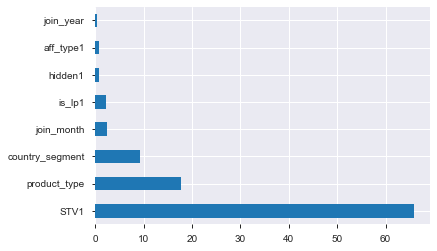

In [32]:
#print the importance of the top 8  feautures
feat_importances = pd.Series(model_cat.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')

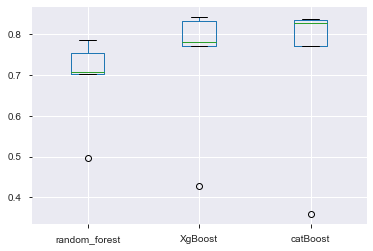

In [33]:
## combine the result of the Kfold for the three models
df_result_Kfold = pd.concat([df_result_rf.reset_index(drop=True),df_result_xg.reset_index(drop=True),
                             df_result_cat], axis=1)

df_result_Kfold.boxplot()

### Let's produce the submission file

From the previous comparison, we can see that XgBoost and CatBoost are performing better with respect the Random Forest (would be interesting to investigate the outlier in the box plot). 

For sake of simplicity, I will produce the final submission output considering only the catBoost model. The best and more performant approach would be to tune and optimize more models and combine the output with the **ensamble method**.
Moreover the use of **pipeline** would make the code more coincise and clean.


In [34]:
#let's load the test data set and produce the same trasformation as in the train set

os.chdir(working_directory)
df_test =pd.read_csv(working_directory+'test.csv')

df_test['is_cancelled'] = df_test['is_cancelled'].fillna(0)
df_test['join_month_year']= pd.DatetimeIndex(df_test['join_date'])
df_test['join_month_year']=df_test['join_month_year'].apply(lambda x: x.strftime('%Y-%m'))

##group by like in the submission example


dfnew=df_test.groupby(['join_month_year','country_segment','product_type']).agg(
                                            STV1=('STV',np.mean),
                                            credit_card_level1=('credit_card_level',lambda x:stats.mode(x)[0]),
                                            is_lp1=('is_lp',lambda x:stats.mode(x)[0]),
                                            hidden1=('hidden',lambda x:stats.mode(x)[0]),
                                            aff_type1=('aff_type',lambda x:stats.mode(x)[0]),
                                            is_cancelled1=('is_cancelled',lambda x:stats.mode(x)[0])                                                                                      
                                                                          ).reset_index()


#### join_month_year 
dfnew['join_year'] = pd.to_numeric(dfnew['join_month_year'].str[:4])
dfnew['join_month'] = pd.to_numeric(dfnew['join_month_year'].str[5:7])

dfnew=dfnew.drop(['join_month_year'], axis=1)


display(dfnew.head())
display(len(dfnew))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,country_segment,product_type,STV1,credit_card_level1,is_lp1,hidden1,aff_type1,is_cancelled1,join_year,join_month
0,AU,type_ex,8.321429,standard,0,0,PPS,0.0,2019,7
1,AU,type_p,5.012961,standard,0,0,PPS,0.0,2019,7
2,AU,type_u,4.924826,standard,0,0,PPS,0.0,2019,7
3,AU,type_x,6.362506,standard,0,0,PPS,0.0,2019,7
4,CA,type_ex,8.599206,standard,0,0,PPS,0.0,2019,7


60

In [35]:
y_pred_cat = model_cat.predict(dfnew)
y_pred_cat = pd.DataFrame(np.array(y_pred_cat).T)


In [36]:
#concatenate df_new with the prediction of the target
final=pd.concat([dfnew, y_pred_cat], axis=1)
#select and rearrange the column as required in the submission file
final = final.iloc[:, [8,9,0,1,10]]
final = final.set_axis([*final.columns[:-1], 'Target'], axis=1, inplace=False)

final.rename(columns={'join_year':'Year',
                          'join_month':'Month'}, 
                 inplace=True)
final['join_month']=pd.to_datetime(final[['Year', 'Month']].assign(Day=1))
final=final.drop(['Year'], axis=1)
final=final.drop(['Month'], axis=1)

# group by product_type, country
final=pd.DataFrame(final)

final.head()

,country_segment,product_type,Target,join_month
0,AU,type_ex,8.334762,2019-07-01
1,AU,type_p,5.979389,2019-07-01
2,AU,type_u,5.807834,2019-07-01
3,AU,type_x,8.799838,2019-07-01
4,CA,type_ex,8.843542,2019-07-01


In [37]:
column_names = ["join_month", "country_segment", "mean_target_p", "mean_target_x", "mean_target_ex", "mean_target_u"]
submission = pd.DataFrame(columns = column_names)

unique_country = final.country_segment.unique()

for i in unique_country:
    mean_target_p=final.loc[(final['country_segment']==i) & (final['product_type']=='type_p') ].Target.values[0]
    mean_target_x=final.loc[(final['country_segment']==i) & (final['product_type']=='type_x') ].Target.values[0]
    mean_target_ex=final.loc[(final['country_segment']==i) & (final['product_type']=='type_ex') ].Target.values[0]
    mean_target_u=final.loc[(final['country_segment']==i) & (final['product_type']=='type_u') ].Target.values[0]
    to_append = ['2019-07-01',i,mean_target_p,mean_target_x,mean_target_ex,mean_target_u]
    submission.loc[len(submission)] = to_append

submission

,join_month,country_segment,mean_target_p,mean_target_x,mean_target_ex,mean_target_u
0,2019-07-01,AU,5.979389,8.799838,8.334762,5.807834
1,2019-07-01,CA,4.732045,7.855193,8.843542,4.697940
2,2019-07-01,CL,7.871580,14.836714,8.135246,7.308163
3,2019-07-01,GB,6.752110,12.218329,8.488202,8.270813
4,2019-07-01,IL,14.048028,24.129020,8.021775,13.158649
5,2019-07-01,LK,4.189269,5.804095,9.472214,3.822699
6,2019-07-01,MY,6.873896,8.633869,8.358834,5.923526
7,2019-07-01,NG,4.632086,3.117660,8.267858,4.192755
8,2019-07-01,NZ,9.629636,12.267968,8.112183,7.301369
9,2019-07-01,Other Countries,5.733904,7.099972,8.320813,4.967929


In [38]:
submission.to_csv(working_directory+'submission.csv', index = False)
